In [159]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint

In [160]:
print(chr(1+48))

1


In [161]:
def Euclidean_Distance(a,b):
    return math.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )

def generate_input_matrix(input_points,n):
    mat = np.empty([4,4])
    for i in range(n):
        for j in range(n):
        # mat[i,j] = math.dist(input_points[i],input_points[j])
            mat[i,j] = Euclidean_Distance(input_points[i],input_points[j])
    return mat


In [162]:
n = 4
input_points = [[0,0],[3,5],[7,2],[4,8]]
POP_SIZE = 10
mat = generate_input_matrix(input_points,n)
print(mat)


[[0.         5.83095189 7.28010989 8.94427191]
 [5.83095189 0.         5.         3.16227766]
 [7.28010989 5.         0.         6.70820393]
 [8.94427191 3.16227766 6.70820393 0.        ]]


In [ ]:
class individual:
    def __init__(self) -> None:
        self.gnome = ""                                                         
        self.fitness = 0

    def __lt__(self, other):
        return self.fitness < other.fitness

    def __gt__(self, other):
        return self.fitness > other.fitness

In [164]:
def repeat(s, ch):
    for i in range(len(s)):
        if s[i] == ch:
            return True

    return False

In [165]:
def create_gnome():
    gnome = "0"
    
    while True:
        if len(gnome)==(n):
            gnome+="0"
            break

        temp = randint(1,n-1)
        if not repeat(gnome,chr(temp+48)):
            gnome+=chr(temp+48)
    return gnome


In [166]:
print(create_gnome())

03210


In [167]:
def cal_fitness(str):
    dist = 0
    for i in range(1,len(str)):
        dist += mat[int(str[i]) , int(str[i-1])]
    return dist


In [168]:
def mutatedGene(gnome):
    gnome = list(gnome)
    while True:
        r = randint(1, n-1)
        r1 = randint(1, n-1)
        if r1 != r:
            temp = gnome[r]
            gnome[r] = gnome[r1]
            gnome[r1] = temp
            break
    return ''.join(gnome)

In [169]:
def cooldown(temp):
    return (90 * temp) / 100


Initial population: 
GNOME     FITNESS VALUE

02310 22.981543376793567
01320 22.981543376793567
02310 22.981543376793567
01230 26.48342773734383
03210 26.48342773734383
01230 26.48342773734383
03120 24.386659459448055
03120 24.386659459448055
03210 26.48342773734383
03120 24.386659459448055

Current Temp:  10000
Generation:  1
GNOME FITNESS_VALUE
01320 22.981543376793567
02310 22.981543376793567
02130 24.386659459448055
02130 24.386659459448055
02130 24.386659459448055
03210 26.48342773734383
01320 22.981543376793567
03120 24.386659459448055
03210 26.48342773734383
01230 26.48342773734383

Current Temp:  9000.0
Generation:  2
GNOME FITNESS_VALUE
02310 22.981543376793567
03210 26.48342773734383
03120 24.386659459448055
02310 22.981543376793567
03120 24.386659459448055
01230 26.48342773734383
02130 24.386659459448055
01230 26.48342773734383
02310 22.981543376793567
01320 22.981543376793567

Current Temp:  8100.0
Generation:  3
GNOME FITNESS_VALUE
01320 22.981543376793567
03210 26.483427

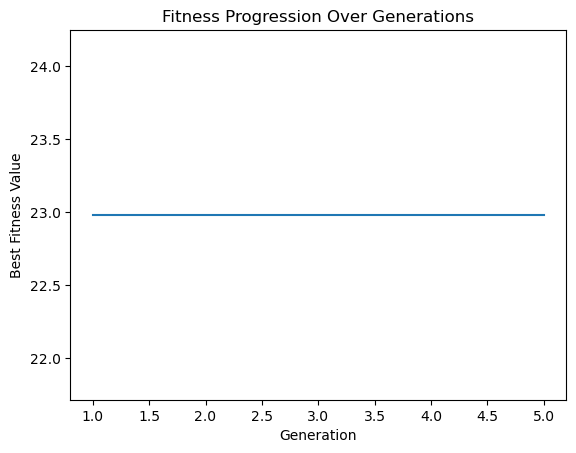

In [180]:

def TSPUtil(mp):
    # Generation number
    gen = 1

    # Total iterations (stop after these many generations)
    thresh = 5

    population = []
    best_fitness_over_time = []  # List to store the best fitness values over time

    # Create the initial population
    for i in range(POP_SIZE):
        temp = individual()
        temp.gnome = create_gnome()
        temp.fitness = cal_fitness(temp.gnome)
        population.append(temp)

    print("\nInitial population: \nGNOME     FITNESS VALUE\n")
    for i in range(POP_SIZE):
        print(population[i].gnome, population[i].fitness)
    print()

    found = False
    temperature = 10000

    while temperature > 1000 and gen <= thresh:
        population.sort(key=lambda x: x.fitness)  # Sort population by fitness (best first)
        print("Current Temp: ", temperature)
        new_population = []

        # Track the best fitness value of the generation
        best_fitness_over_time.append(population[0].fitness)

        for i in range(POP_SIZE):
            p1 = population[i]

            while True:
                new_g = mutatedGene(p1.gnome)
                new_gnome = individual()  # New individual
                new_gnome.gnome = new_g
                new_gnome.fitness = cal_fitness(new_gnome.gnome)

                # If new individual is better or probabilistically accepted
                if new_gnome.fitness <= population[i].fitness:
                    new_population.append(new_gnome)
                    break
                else:
                    prob = pow(2.7, -1 * (float(new_gnome.fitness - population[i].fitness) / temperature))
                    if prob > 0.5:
                        new_population.append(new_gnome)
                        break

        temperature = cooldown(temperature)
        population = new_population
        print("Generation: ", gen)
        print("GNOME FITNESS_VALUE")
        for i in range(POP_SIZE):
            print(population[i].gnome, population[i].fitness)
        print()

        gen += 1

    plt.plot(range(1, gen), best_fitness_over_time)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Value")
    plt.title("Fitness Progression Over Generations")
    plt.show()

# Call the TSPUtil function
TSPUtil(None)



Initial population: 
GNOME     FITNESS VALUE

02130 24.386659459448055
01320 22.981543376793567
02310 22.981543376793567
01320 22.981543376793567
01320 22.981543376793567
01320 22.981543376793567
01230 26.48342773734383
03210 26.48342773734383
01320 22.981543376793567
03210 26.48342773734383

Current Temp:  10000
Generation:  1
GNOME FITNESS_VALUE
02310 22.981543376793567
02130 24.386659459448055
02310 22.981543376793567
02310 22.981543376793567
03120 24.386659459448055
03120 24.386659459448055
02310 22.981543376793567
01320 22.981543376793567
01230 26.48342773734383
01230 26.48342773734383

Current Temp:  9000.0
Generation:  2
GNOME FITNESS_VALUE
03210 26.48342773734383
03210 26.48342773734383
03210 26.48342773734383
02130 24.386659459448055
01230 26.48342773734383
01230 26.48342773734383
01320 22.981543376793567
02130 24.386659459448055
03210 26.48342773734383
02130 24.386659459448055

Current Temp:  8100.0
Generation:  3
GNOME FITNESS_VALUE
01230 26.48342773734383
01230 26.48342773

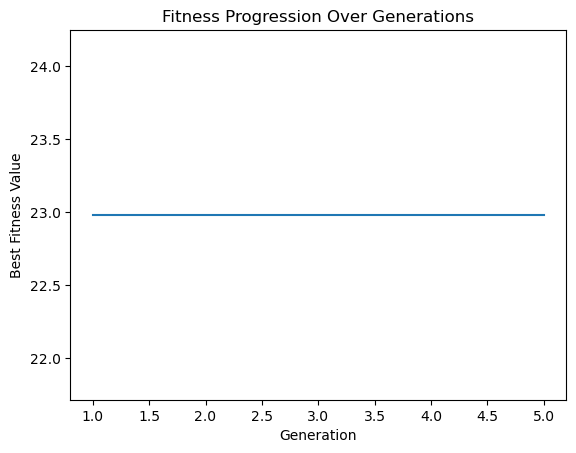

In [179]:
TSPUtil(mat)